In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [3]:
# load data from google drive
# should be executed every time you have to load the file in google drive

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True) # your google drive will be mounted as '/content/gdrive/My Drive/*'


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
# load train, test, people from google drive
train = pd.read_csv('../data/act_train.csv', parse_dates=['date'])
# train = pd.read_csv('/content/gdrive/My Drive/colab/redhat/dataset/act_train.csv', parse_dates=['date'])
# test = pd.read_csv('/content/gdrive/My Drive/colab/redhat/dataset/act_test.csv', parse_dates=['date'])
people = pd.read_csv('../data/people.csv', parse_dates=['date'])
# people = pd.read_csv('/content/gdrive/My Drive/colab/redhat/dataset/people.csv', parse_dates=['date'])

# train = pd.read_csv('../data/act_train.csv', parse_dates=['date'])
# test = pd.read_csv('../data/act_test.csv', parse_dates=['date'])
# people = pd.read_csv('../data/people.csv', parse_dates=['date'])

sel_col = [2, *np.arange(4,14)]
a = train.columns[sel_col]
b = ['act_' + train.columns[i] for i in sel_col]
mapping = dict(zip(a, b))

sel_col_ppl = np.arange(1,41)
a_ppl = people.columns[sel_col_ppl]
b_ppl = ['ppl_' + people.columns[i] for i in sel_col_ppl]
mapping_ppl = dict(zip(a_ppl, b_ppl))

train = train.rename(columns=mapping)
# test = test.rename(columns=mapping)
people = people.rename(columns=mapping_ppl)


df_train = pd.merge(train, people, on='people_id')
# df_test = pd.merge(test, people, on='people_id')


# del train, test, people
del train, people

In [3]:
df_train.head()

,people_id,activity_id,act_date,activity_category,act_char_1,act_char_2,act_char_3,act_char_4,act_char_5,act_char_6,...,ppl_char_29,ppl_char_30,ppl_char_31,ppl_char_32,ppl_char_33,ppl_char_34,ppl_char_35,ppl_char_36,ppl_char_37,ppl_char_38
0,ppl_100,act2_1734928,2023-08-26,type 4,NaN,NaN,NaN,NaN,NaN,NaN,...,False,True,True,False,False,True,True,True,False,36
1,ppl_100,act2_2434093,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,...,False,True,True,False,False,True,True,True,False,36
2,ppl_100,act2_3404049,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,...,False,True,True,False,False,True,True,True,False,36
3,ppl_100,act2_3651215,2023-08-04,type 2,NaN,NaN,NaN,NaN,NaN,NaN,...,False,True,True,False,False,True,True,True,False,36
4,ppl_100,act2_4109017,2023-08-26,type 2,NaN,NaN,NaN,NaN,NaN,NaN,...,False,True,True,False,False,True,True,True,False,36


In [4]:
len(df_train.columns)

55

In [5]:
df_train.columns.to_series().groupby(df_train.dtypes).groups

{dtype('<M8[ns]'): Index(['act_date', 'ppl_date'], dtype='object'),
 dtype('bool'): Index(['ppl_char_10', 'ppl_char_11', 'ppl_char_12', 'ppl_char_13',
        'ppl_char_14', 'ppl_char_15', 'ppl_char_16', 'ppl_char_17',
        'ppl_char_18', 'ppl_char_19', 'ppl_char_20', 'ppl_char_21',
        'ppl_char_22', 'ppl_char_23', 'ppl_char_24', 'ppl_char_25',
        'ppl_char_26', 'ppl_char_27', 'ppl_char_28', 'ppl_char_29',
        'ppl_char_30', 'ppl_char_31', 'ppl_char_32', 'ppl_char_33',
        'ppl_char_34', 'ppl_char_35', 'ppl_char_36', 'ppl_char_37'],
       dtype='object'),
 dtype('int64'): Index(['outcome', 'ppl_char_38'], dtype='object'),
 dtype('O'): Index(['people_id', 'activity_id', 'activity_category', 'act_char_1',
        'act_char_2', 'act_char_3', 'act_char_4', 'act_char_5', 'act_char_6',
        'act_char_7', 'act_char_8', 'act_char_9', 'act_char_10', 'ppl_char_1',
        'ppl_group_1', 'ppl_char_2', 'ppl_char_3', 'ppl_char_4', 'ppl_char_5',
        'ppl_char_6', 'ppl_ch

In [6]:
for d in ['act_date', 'ppl_date']:
    print('Start of ' + d + ': ' + str(df_train[d].min().date()))
    print('  End of ' + d + ': ' + str(df_train[d].max().date()))
    print('Range of ' + d + ': ' + str(df_train[d].max() - df_train[d].min()) + '\n')

Start of act_date: 2022-07-17
  End of act_date: 2023-08-31
Range of act_date: 410 days 00:00:00

Start of ppl_date: 2020-05-18
  End of ppl_date: 2023-08-31
Range of ppl_date: 1200 days 00:00:00



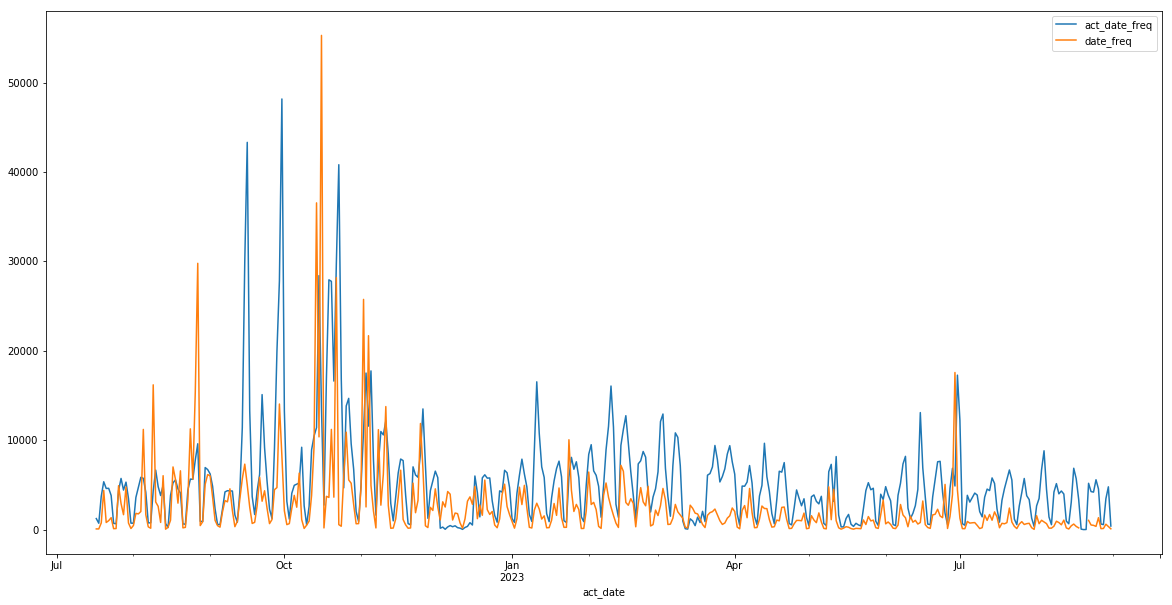

In [7]:
date = pd.DataFrame()
date['act_date_freq'] = df_train.groupby('act_date')['outcome'].count()
date['date_freq'] = df_train.groupby('ppl_date')['outcome'].count()
date.plot(figsize=(20, 10))

In [8]:
max_date = df_train['ppl_date'].max().date() #Datetime
min_date = df_train['ppl_date'].min() #pandas.Timestamp
val = pd.to_datetime(df_train['ppl_date'].values[0]) #pandas.Timestamp
val_ = df_train['ppl_date'].values[0] #numpy.datetime64

delta = pd.to_datetime(df_train['ppl_date'].values)-min_date
print(delta.days)

# print(type(max_date), type(min_date), type(val), type(val_), type(delta))
# print(val-min_date, pd.to_timedelta([delta]).astype('timedelta64[h]')[0])

Int64Index([407, 407, 407, 407, 407, 407, 233, 233, 753, 753,
            ...
            963, 963, 963, 963, 963, 963, 963, 963, 963, 963],
           dtype='int64', length=2197291)


### Convert Timestamp column to day_difference from min_date

In [9]:
df_train['ppl_date'] = (pd.to_datetime(df_train['ppl_date'].values)-min_date).days
df_train['act_date'] = (pd.to_datetime(df_train['act_date'].values)-min_date).days
# df_train.head()

In [10]:
print(df_train['act_date'].max(), df_train['act_date'].min())

1200 790


### Normalization of date data

In [11]:
df_train['ppl_date']=(df_train['ppl_date']-df_train['ppl_date'].min())/(df_train['ppl_date'].max()-df_train['ppl_date'].min())
df_train['act_date']=(df_train['act_date']-df_train['act_date'].min())/(df_train['act_date'].max()-df_train['act_date'].min())

### Normalization of 'ppl_char_38'

In [12]:
print(df_train['ppl_char_38'].max(), df_train['ppl_char_38'].min())

100 0


In [13]:
df_train['ppl_char_38']=(df_train['ppl_char_38']-df_train['ppl_char_38'].min())/(df_train['ppl_char_38'].max()-df_train['ppl_char_38'].min())


In [15]:
# print(df_train['ppl_char_38'].max(), df_train['ppl_char_38'].min())
print(df_train['ppl_char_38'])


0          0.36
1          0.36
2          0.36
3          0.36
4          0.36
5          0.36
6          0.76
7          0.76
8          0.99
9          0.99
10         0.99
11         0.99
12         0.99
13         0.99
14         0.99
15         0.99
16         0.99
17         0.99
18         0.99
19         0.99
20         0.99
21         0.99
22         0.99
23         0.99
24         0.99
25         0.99
26         0.99
27         0.99
28         0.99
29         0.99
           ... 
2197261    0.95
2197262    0.95
2197263    0.95
2197264    0.95
2197265    0.95
2197266    0.95
2197267    0.95
2197268    0.95
2197269    0.95
2197270    0.95
2197271    0.95
2197272    0.95
2197273    0.95
2197274    0.95
2197275    0.95
2197276    0.95
2197277    0.95
2197278    0.95
2197279    0.95
2197280    0.95
2197281    0.95
2197282    0.95
2197283    0.95
2197284    0.95
2197285    0.95
2197286    0.95
2197287    0.95
2197288    0.95
2197289    0.95
2197290    0.95
Name: ppl_char_38, Lengt

### Convert Bool column to 1/0

In [16]:
to_replace_bool_col = ['ppl_char_10', 'ppl_char_11', 'ppl_char_12', 'ppl_char_13',
        'ppl_char_14', 'ppl_char_15', 'ppl_char_16', 'ppl_char_17',
        'ppl_char_18', 'ppl_char_19', 'ppl_char_20', 'ppl_char_21',
        'ppl_char_22', 'ppl_char_23', 'ppl_char_24', 'ppl_char_25',
        'ppl_char_26', 'ppl_char_27', 'ppl_char_28', 'ppl_char_29',
        'ppl_char_30', 'ppl_char_31', 'ppl_char_32', 'ppl_char_33',
        'ppl_char_34', 'ppl_char_35', 'ppl_char_36', 'ppl_char_37']

df_train[to_replace_bool_col] = df_train[to_replace_bool_col].astype(int)
# df_train.head()

### Randomly choose 100,000 samples for training and 10,000 samples for validation

In [17]:
n_train=100000
n_valid=10000

frac=(n_train+n_valid)/len(df_train)
df_random=df_train.sample(frac=frac,replace=False,random_state=1) # give random_state to get the same result every time

to_convert_obj_col = ['activity_category', 'act_char_1',
        'act_char_2', 'act_char_3', 'act_char_4', 'act_char_5', 'act_char_6',
        'act_char_7', 'act_char_8', 'act_char_9', 'act_char_10', 'ppl_char_1',
        'ppl_group_1', 'ppl_char_2', 'ppl_char_3', 'ppl_char_4', 'ppl_char_5',
        'ppl_char_6', 'ppl_char_7', 'ppl_char_8', 'ppl_char_9']

df_random_oh=pd.get_dummies(df_random,columns=to_convert_obj_col,sparse=True)

df_train_random_oh=df_random_oh[0:n_train]
df_valid_random_oh=df_random_oh[n_train:]

### Convert Object column using one-hot encoding

In [18]:
  df_train_random_oh.shape

(100000, 18565)

### Save train dataset and valid dataset as pkl file

In [19]:
# df_train_random_oh.to_pickle('/content/gdrive/My Drive/colab/redhat/dataset/train_one_hot_100000_new.pkl')
# df_valid_random_oh.to_pickle('/content/gdrive/My Drive/colab/redhat/dataset/valid_one_hot_10000_new.pkl')
df_train_random_oh.to_pickle('../data/train_one_hot_100000_new1.pkl')
df_valid_random_oh.to_pickle('../data/valid_one_hot_10000_new1.pkl')